In [2]:
from scipy import stats
import math
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Single Source of Truth

The cleaning process was *messy* and generated hundreds of lines of code. So I took my Single Source of Truth, named **ssot**, and saved it in the same folder as the original dataset CSVs:

**ssot.to_pickle('./ssot.pkl')**

To open a dataset saved with **to_pickle** in a new notebook, you use terminal (in the new notebook, of course) to get to the right directory and then type:

**variable_name = pd.read_pickle('./ssot.pkl')**

In [10]:
cd CSVs

/Users/cherishkim/Code/school_projects/DS11/Assignments/DS/NPS Project/SA/CSVs


In [24]:
ssot = pd.read_pickle('./ssot.pkl')
ssot.head()

,Year,Week,Track,Location,Schedule Pace Rating,Overall Satisfaction Rating,Net Promoter Status
0,2016,Week 1,NaN,Los Angeles,8,6,Detractor
1,2016,Week 1,NaN,Los Angeles,8,8,Passive
2,2016,Week 1,NaN,Los Angeles,8,8,Passive
3,2016,Week 1,NaN,Los Angeles,8,8,Passive
4,2016,Week 1,NaN,Los Angeles,10,8,Passive


# NPS Calculation

The formula for Net Promoter Score is as follows:

**((# of promoters) - (# of detractors)) / (# of total responses)) * 100**

In [21]:
promo = len(ssot[(ssot['Net Promoter Status']=='Promoter')])
detract = len(ssot[(ssot['Net Promoter Status']=='Detractor')])
total = len(ssot)
((promo - detract)/total) * 100

35.92789840229414

# Question Time!

***PROBABILITY?***

Columns:
* Year
* Week
* Track
* Location
* Schedule Pace Rating
* Overall Satisfaction Rating
* NPS

Questions:
1. Did percentage of promoters increase/decrease from 2016 to 2017?
1. Which 


Q2: Which weeks on both years yield the most promoters?

Q3: Of those promoters, how many were on the intro track?

Q4: And how many were on the app track?

Q5: And how many were on the games track?

Q6: Which weeks on both years yield the most detractors?

Q7: Of those detractors, how many were on the intro track?

Q8: And how many were on the app track?

Q9: And how many were on the games track?

## (Thanks, Kash!) Did percentage of promoters increase or decrease from 2016 to 2017?

Year
2016    AxesSubplot(0.125,0.125;0.775x0.755)
2017    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Overall Satisfaction Rating, dtype: object

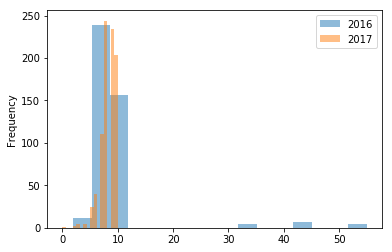

In [22]:
ssot[ssot['Track']=='Apps'].groupby('Year')['Overall Satisfaction Rating']\
.plot(bins=16, kind='hist', legend=True, alpha=0.5)

## Which weeks